8
[1.122072e-05 1.302072e-05 1.242072e-05 1.152072e-05 1.362072e-05
 1.182072e-05 1.282072e-05 1.122072e-05 1.142072e-05 1.372072e-05
 1.172072e-05 1.162072e-05 1.262072e-05 1.242072e-05 1.172072e-05]
23.438720012313027
24.69072001304403
8
[6.44152001e-06 5.96152001e-06 6.14152001e-06 6.20152001e-06
 6.56152001e-06 5.78152001e-06 6.14152001e-06 5.96152001e-06
 5.78152001e-06 5.90152001e-06 6.02152001e-06 6.02152001e-06
 6.62152001e-06 6.44152001e-06 5.96152001e-06]
17.125920005683767


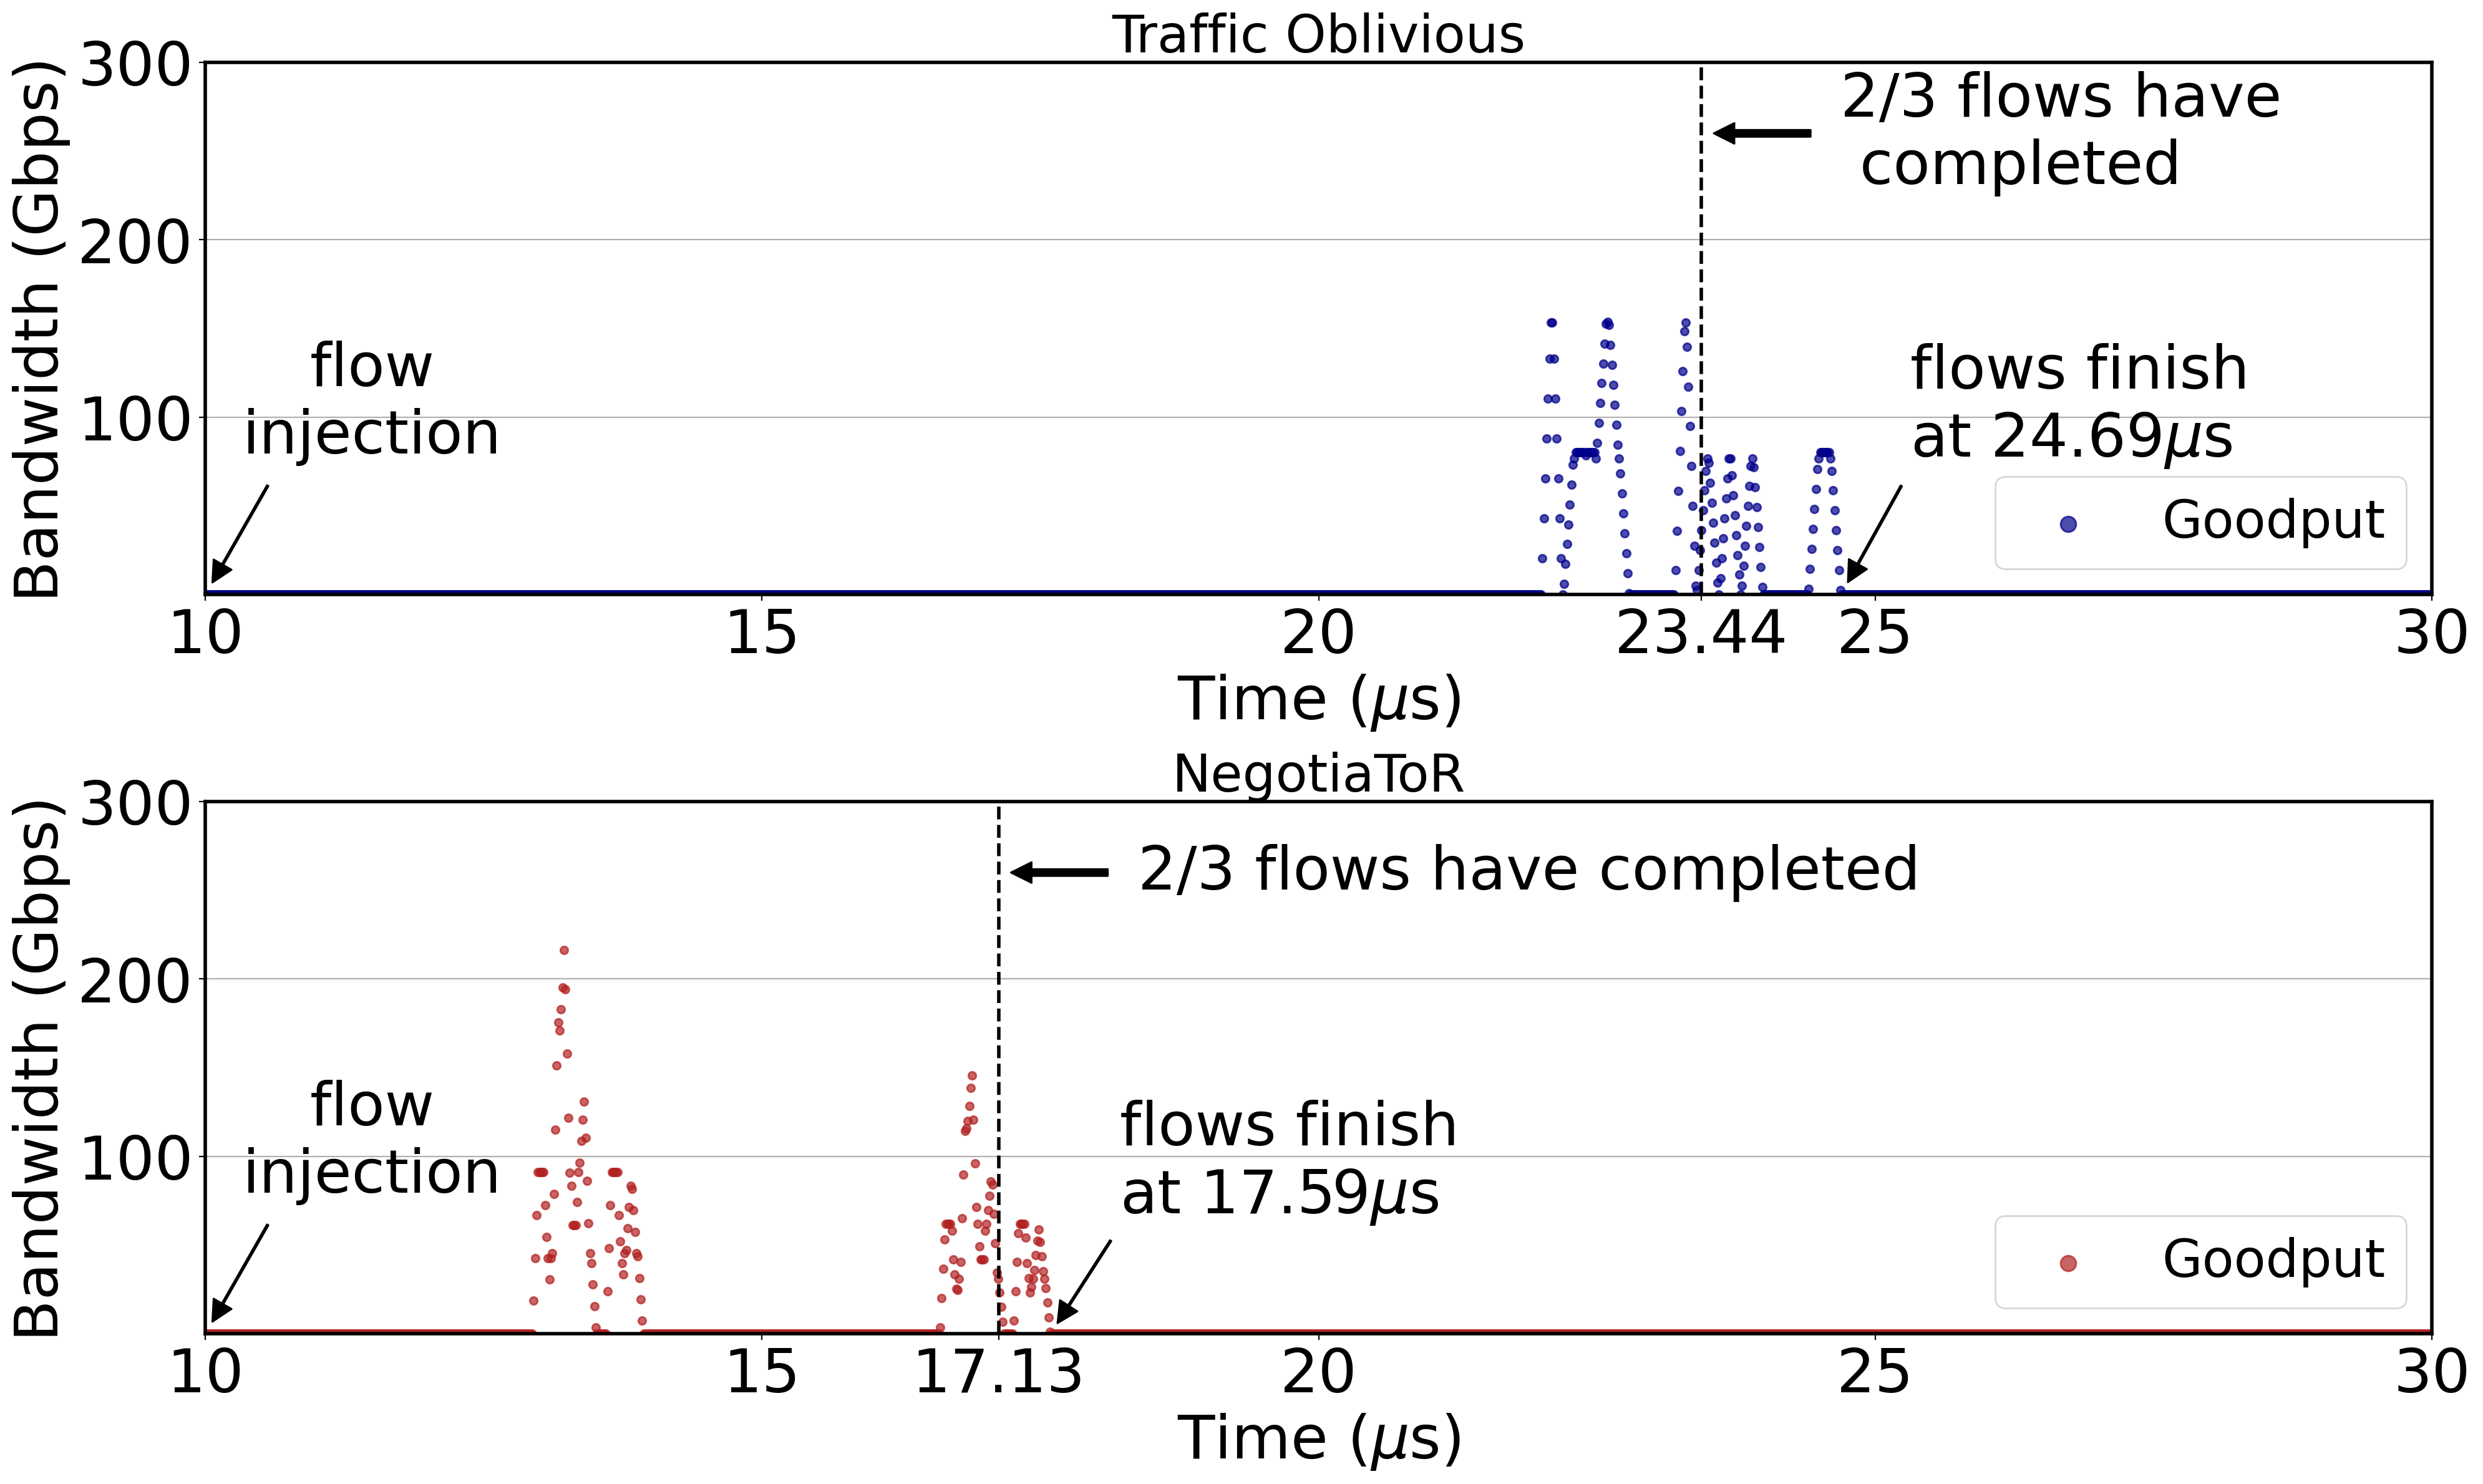

In [1]:
# VLB Incast
import numpy as np
from matplotlib import pyplot as plt


# workloads = ['W4_0.1', 'W4_0.25', 'W4_0.5', 'W4_0.75', 'W4_1']
# workloads = ["incast_degree1", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
workloads = ["incast_degree15"]
# workloads = ['W4_1']
# workloads = ["permutation_size1", "permutation_size3", "permutation_size10", "permutation_size30", "permutation_size100"]
# workloads = ["permutation_size50"]
host_to_observe = 73
myfontsize = 35
scheme = 'VLB'

load = 'Pureincast'
# load = 'Permutation'
show_intervals = [13, 26, 52, 78, 104, 208]
show_intervals = [104]

fig = plt.figure(figsize=(20,12), dpi=200)

for iii, workload in enumerate(workloads):
    for show_interval in show_intervals:
        dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/DATA_vote_" + workload
        Dst_filename = dir_name + '/RECEIVER_BANDWIDTH.txt'
        Dst_bandwidth = np.loadtxt(Dst_filename, delimiter=" ", usecols=(host_to_observe,))

        

        sample_interval = 13
        # show_interval = 832
        show_time = 50000
        # show_time = 500000
        start_time = 10000
        start_index = int(start_time/sample_interval)
        # start_index = 100000  #1.3ms
        merge = int(show_interval/sample_interval)
        print(merge)

        Dst_bandwidth_new = np.zeros(int(len(Dst_bandwidth)) - merge)
        for i in range(len(Dst_bandwidth_new)):
            Dst_bandwidth_new[i] = np.sum(Dst_bandwidth[i : i + merge]) 
        Dst_bandwidth_new = Dst_bandwidth_new[start_index : start_index + int(show_time/sample_interval)] *8/show_interval
        time_stamp = np.arange(len(Dst_bandwidth_new)) * sample_interval/1000 + start_index/1000*sample_interval# 用us做单位
        # print(np.shape(Dst_bandwidth))
        # print(np.shape(time_stamp))
        fig1=plt.subplot(211)

        
        # ax=plt.axes()
        fig1.spines['bottom'].set_linewidth('2.0')
        fig1.spines['top'].set_linewidth('2.0')
        fig1.spines['left'].set_linewidth('2.0')
        fig1.spines['right'].set_linewidth('2.0')
        
        plt.scatter(time_stamp, Dst_bandwidth_new, s=20, c='darkblue', alpha=0.7, label="Goodput")

        # Trans_filename = dir_name + '/TRANSFER_BANDWIDTH.txt'
        # Trans_bandwidth = np.loadtxt(Trans_filename, delimiter=" ", usecols=(host_to_observe,))
        # Trans_bandwidth_new = np.zeros(int(len(Trans_bandwidth)) - merge)
        # for i in range(len(Trans_bandwidth_new)):
        #     Trans_bandwidth_new[i] = np.sum(Trans_bandwidth[i : i + merge]) 
        # Trans_bandwidth_new = Trans_bandwidth_new[start_index : start_index + int(show_time/sample_interval)] *8/show_interval
        # plt.scatter(time_stamp, Trans_bandwidth_new, s=10, c='b', alpha=0.7,label="Intermediate Throughput")

        plt.xlabel(r"Time ($\mu$s)", fontsize=myfontsize)
        plt.ylabel("Bandwidth (Gbps)", fontsize=myfontsize)
        # xticks = [0, 100, 200, 300, 400, 500]
        # plt.xticks(xticks, fontsize=myfontsize)
        
        yticks = [100, 200, 300, 400]
        plt.yticks(yticks, fontsize=myfontsize)
        plt.grid(axis='y')

        plt.ylim([0,300])
        plt.legend(loc="lower right", fontsize=myfontsize-5, markerscale=2)
        data = np.loadtxt("../DATA/Count_BW_13/VLB_Pureincast/DATA_vote_incast_degree15/FCT.txt", usecols=7)
        graduation_66 = np.percentile(data, 66) * 1e6 + 10.97
        end_time = max(data)*1e6 + 10.97
        print(data)
        print(graduation_66)
        print(end_time)
        plt.plot((graduation_66, graduation_66), (0,400), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (graduation_66,260), xytext=(70, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=graduation_66+1.25,y=260, s="2/3 flows have\n completed", verticalalignment='center', fontsize=myfontsize)

        # plt.plot((10, 10), (0,800), linestyle='-.', color='k', linewidth=2)
        plt.annotate('', (10,0), xytext=(40, 70),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1, width=1))
        plt.text(x=10+1.5,y=80, s="flow\ninjection", horizontalalignment='center', fontsize=myfontsize)

        plt.annotate('flows finish \nat '+str(round(end_time,2)) +r'$\mu$s', (end_time,0), xytext=(40, 80),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1, width=1))
        # plt.text(x=10+1.5,y=80, s="flow\ninjection", horizontalalignment='center', fontsize=myfontsize)
        plt.title("Traffic Oblivious", fontsize=myfontsize-5)
        plt.xlim((10,30))
        plt.xticks([10, 15, 20, 25, graduation_66, 30], (10, 15, 20, 25, round(graduation_66,2), 30), fontsize=myfontsize)
        plt.subplots_adjust( bottom=0.15, top=0.9, left=0.15, right=0.95)
        

        # ax1.tight_layout()
        # plt.savefig("../FIGS/NegotiaToR Figs/5/"+ scheme + "_" + load +str(show_interval)+ ".png")
import numpy as np
from matplotlib import pyplot as plt


# workloads = ['W4_0.1', 'W4_0.25', 'W4_0.5', 'W4_0.75', 'W4_1']
# workloads = ["incast_degree1", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
workloads = ["incast_degree15"]
# workloads = ['W4_1']
# workloads = ["permutation_size1", "permutation_size3", "permutation_size10", "permutation_size30", "permutation_size100"]
# workloads = ["permutation_size50"]
host_to_observe = 73
myfontsize = 35

scheme = 'NegotiaToR'
load = 'Pureincast'
# show_intervals = [13, 26, 52, 78, 104, 208]

for iii, workload in enumerate(workloads):
    for show_interval in show_intervals:
        dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/DATA_vote_" + workload
        Dst_filename = dir_name + '/RECEIVER_BANDWIDTH.txt'
        Dst_bandwidth = np.loadtxt(Dst_filename, delimiter=" ", usecols=(host_to_observe,))

        
        sample_interval = 13
        # show_interval = 832
        show_time = 50000
        # show_time = 500000
        start_time = 10000
        start_index = int(start_time/sample_interval)
        # start_index = 100000  #1.3ms
        merge = int(show_interval/sample_interval)
        print(merge)

        Dst_bandwidth_new = np.zeros(int(len(Dst_bandwidth)) - merge)
        for i in range(len(Dst_bandwidth_new)):
            Dst_bandwidth_new[i] = np.sum(Dst_bandwidth[i : i + merge]) 
        Dst_bandwidth_new = Dst_bandwidth_new[start_index : start_index + int(show_time/sample_interval)] *8/show_interval
        time_stamp = np.arange(len(Dst_bandwidth_new)) * sample_interval/1000 + start_index/1000*sample_interval# 用us做单位
        # print(np.shape(Dst_bandwidth))
        # print(np.shape(time_stamp))
        # plt.subplot(5,1,iii+1)

        
        # plt.figure(figsize=(20, 6))
        fig2=plt.subplot(212)
        # ax=plt.axes()
        fig2.spines['bottom'].set_linewidth('2.0')
        fig2.spines['top'].set_linewidth('2.0')
        fig2.spines['left'].set_linewidth('2.0')
        fig2.spines['right'].set_linewidth('2.0')
        # fig=plt.figure(figsize=(20, 6))
        
        
        plt.scatter(time_stamp, Dst_bandwidth_new, s=20, c='firebrick', alpha=0.7, label="Goodput")

        
        plt.xlabel(r"Time ($\mu$s)", fontsize=myfontsize)
        plt.ylabel("Bandwidth (Gbps)", fontsize=myfontsize)
        # xticks = [0, 100, 200, 300, 400, 500]
        # plt.xticks(xticks, fontsize=myfontsize)
        yticks = [100, 200, 300, 400]
        plt.yticks(yticks, fontsize=myfontsize)

        plt.ylim([0,300])
        plt.grid(axis='y')
        plt.legend(loc="lower right", fontsize=myfontsize-5, markerscale=2)
        data = np.loadtxt("../DATA/Count_BW_13/NegotiaToR_Pureincast/DATA_vote_incast_degree15/FCT.txt", usecols=7) # 
        graduation_66 = np.percentile(data, 66) * 1e6 + 10.97
        end_time = max(data)*1e6 + 10.97
        print(data)
        print(graduation_66)
        plt.plot((graduation_66, graduation_66), (0,400), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (graduation_66,260), xytext=(70, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=graduation_66+1.25,y=260, s="2/3 flows have completed", verticalalignment='center',fontsize=myfontsize)

        plt.annotate('flows finish \nat '+str(round(end_time,2)) +r'$\mu$s', (end_time,0), xytext=(40, 70),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1, width=1))
        # plt.plot((10, 10), (0,800), linestyle='-.', color='k', linewidth=2)
        plt.annotate('', (10,0), xytext=(40, 70),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1, width=1))
        plt.text(x=10+1.5,y=80, s="flow\ninjection", horizontalalignment='center', fontsize=myfontsize)
        # plt.title(workload)
        plt.xlim((10,30))
        plt.xticks([10, 15, 20, 25, graduation_66, 30], (10, 15, 20, 25, round(graduation_66,2), 30), fontsize=myfontsize)

        plt.subplots_adjust( bottom=0.15, top=0.9, left=0.15, right=0.95)
        plt.title("NegotiaToR", fontsize=myfontsize-5)

        plt.tight_layout()
        plt.savefig("../FIGS/NegotiaToR Figs/5/incast_bandwidth.png")

8


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


16256
128
8
135.53152004774915


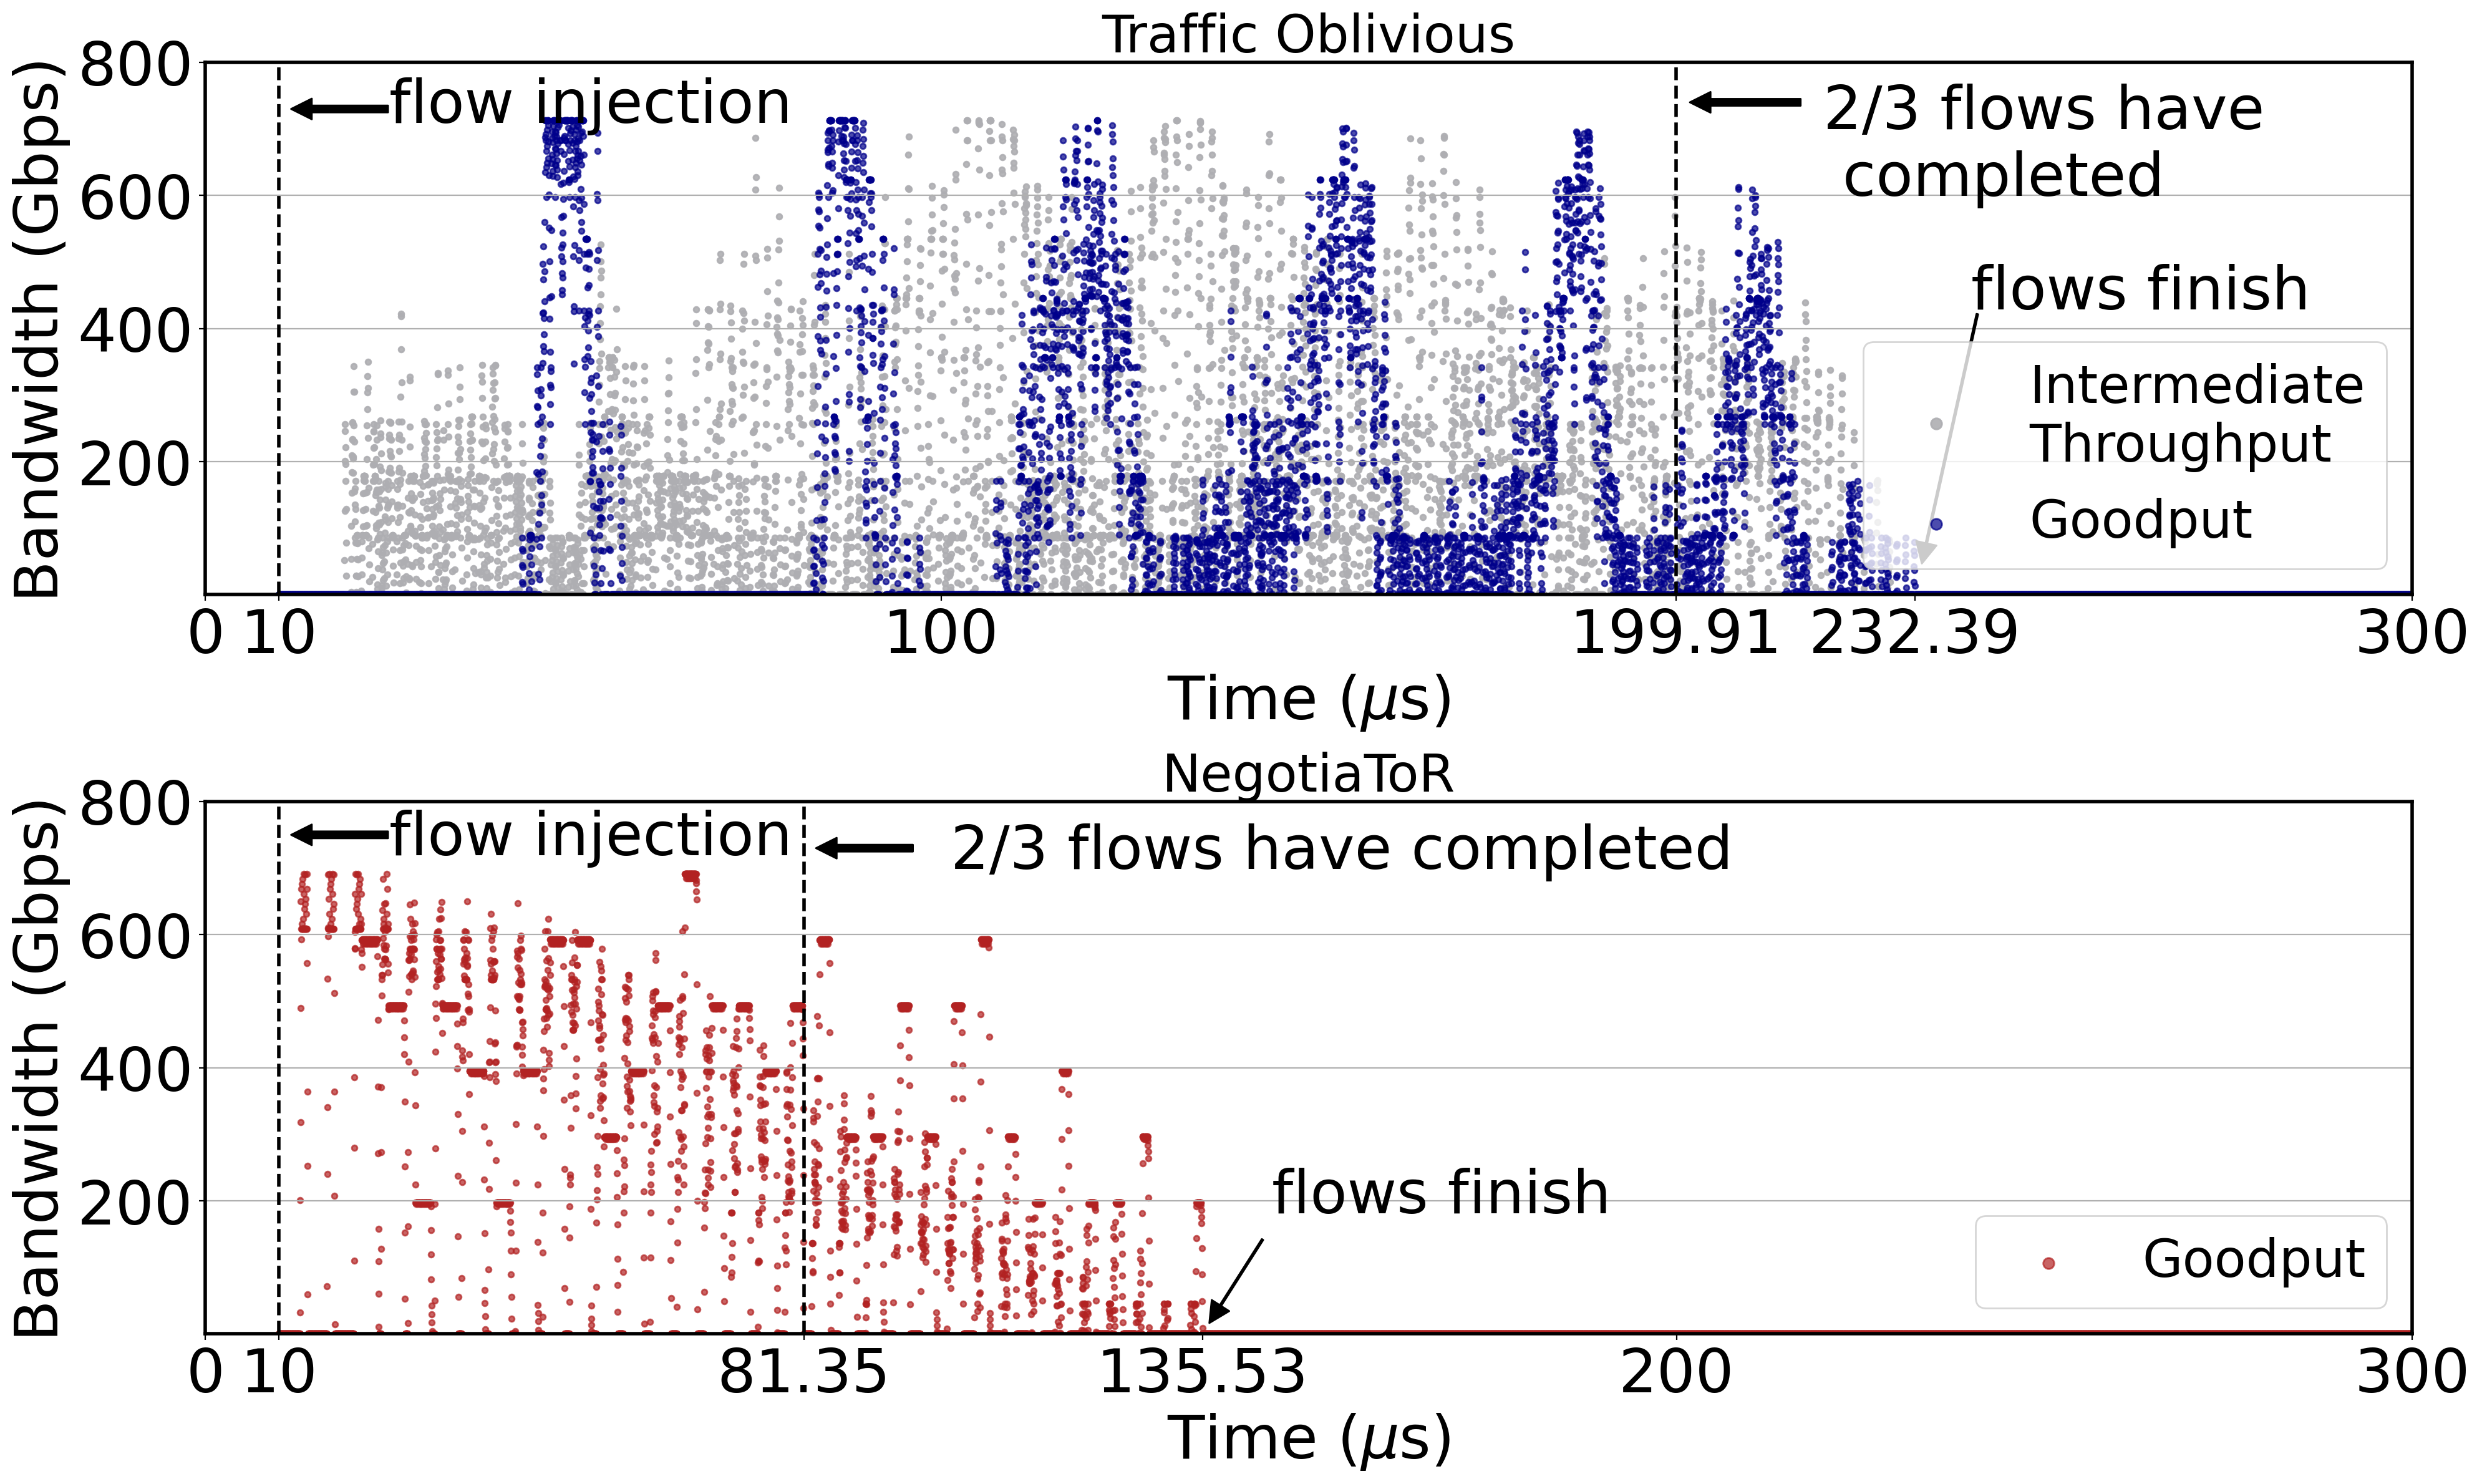

In [2]:
## VLB Permutation

import numpy as np
from matplotlib import pyplot as plt


# workloads = ['W4_0.1', 'W4_0.25', 'W4_0.5', 'W4_0.75', 'W4_1']
# workloads = ["incast_degree1", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
workloads = ["permutation_size30"]
# workloads = ['W4_1']
# workloads = ["permutation_size1", "permutation_size3", "permutation_size10", "permutation_size30", "permutation_size100"]
host_to_observe = 73
# myfontsize = 35

scheme = 'VLB'

load = 'Permutation'
show_intervals = [13, 26, 52, 78, 104, 208]
show_intervals = [104]
fig = plt.figure(figsize=(20,12), dpi=200)
ax=plt.axes()
ax.spines['bottom'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['right'].set_linewidth('2.0')
for iii, workload in enumerate(workloads):
    for show_interval in show_intervals:
        dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/DATA_vote_" + workload
        Dst_filename = dir_name + '/RECEIVER_BANDWIDTH.txt'
        Dst_bandwidth = np.loadtxt(Dst_filename, delimiter=" ", usecols=(host_to_observe,))

        

        sample_interval = 13
        # show_interval = 832
        show_time = 50000
        show_time = 500000
        start_time = 10000
        start_index = int(start_time/sample_interval)
        # start_index = 100000  #1.3ms
        merge = int(show_interval/sample_interval)
        print(merge)

        Dst_bandwidth_new = np.zeros(int(len(Dst_bandwidth)) - merge)
        for i in range(len(Dst_bandwidth_new)):
            Dst_bandwidth_new[i] = np.sum(Dst_bandwidth[i : i + merge]) 
        Dst_bandwidth_new = Dst_bandwidth_new[start_index : start_index + int(show_time/sample_interval)] *8/show_interval
        time_stamp = np.arange(len(Dst_bandwidth_new)) * sample_interval/1000 + start_index/1000*sample_interval# 用us做单位
        # print(np.shape(Dst_bandwidth))
        # print(np.shape(time_stamp))
        # plt.subplot(5,1,iii+1)
        

        Trans_filename = dir_name + '/TRANSFER_BANDWIDTH.txt'
        Trans_bandwidth = np.loadtxt(Trans_filename, delimiter=" ", usecols=(host_to_observe,))
        Trans_bandwidth_new = np.zeros(int(len(Trans_bandwidth)) - merge)
        for i in range(len(Trans_bandwidth_new)):
            Trans_bandwidth_new[i] = np.sum(Trans_bandwidth[i : i + merge]) 
        Trans_bandwidth_new = Trans_bandwidth_new[start_index : start_index + int(show_time/sample_interval)] *8/show_interval
        
        # plt.figure(figsize=(20, 6))
        fig1 = plt.subplot(211)
        # ax=plt.axes()
        fig1.spines['bottom'].set_linewidth('2.0')
        fig1.spines['top'].set_linewidth('2.0')
        fig1.spines['left'].set_linewidth('2.0')
        fig1.spines['right'].set_linewidth('2.0')
        plt.scatter(time_stamp[::2], Trans_bandwidth_new[::2], s=10, c=(174/255, 174/255, 178/255), alpha=0.9,label="Intermediate\nThroughput")
        plt.scatter(time_stamp[::2], Dst_bandwidth_new[::2], s=10, c='darkblue', alpha=0.7, label="Goodput")


        plt.xlabel(r"Time ($\mu$s)", fontsize=myfontsize)
        plt.ylabel("Bandwidth (Gbps)", fontsize=myfontsize)
        # xticks = [0, 100, 200, 300, 400, 500]
        yticks = [200, 400, 600, 800]
        plt.yticks(yticks, fontsize=myfontsize)
        plt.grid(axis='y')

        plt.ylim([0,800])
        plt.legend(loc="lower right", fontsize=myfontsize-5, markerscale=2)
        data = np.loadtxt("../DATA/Count_BW_13/VLB_Permutation/DATA_vote_permutation_size30/FCT.txt", usecols=6)
        # graduation_66 = np.percentile(data, 66) * 1e6 + 10
        print(len(data))
        data = data[np.arange(73, len(data), 127)]
        print(len(data))
        graduation_66 = (np.percentile(data, 66)-1) * 1e6
        end_time = (np.percentile(data,100) -1)*1e6
        # end_time = np.nonzero(Dst_bandwidth_new)[-1][-1]* 13 /1e3 + 10

        plt.plot((graduation_66, graduation_66), (0,800), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (graduation_66,740), xytext=(80, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=graduation_66+20,y=600, s="2/3 flows have\n completed", fontsize=myfontsize)

        plt.xticks([0, 10, 100, graduation_66, end_time,300], (0, 10, 100, round(graduation_66+0.01, 2), round(end_time, 2), 300), fontsize=myfontsize)


        plt.plot((10, 10), (0,800), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (10,730), xytext=(70, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=10+15,y=710, s="flow injection", fontsize=myfontsize)
        # plt.annotate('Flows finish \nat '+str(round(end_time,2)) +r'$\mu$s', (end_time,0), xytext=(40, 130),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1, width=1))
        plt.annotate('', (end_time,0), xytext=(40, 180),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1, width=1))
        plt.text(x=240, y=430, s = "flows finish", fontsize=myfontsize)

        plt.title("Traffic Oblivious", fontsize=myfontsize-5)
        plt.xlim((0,300))
        plt.subplots_adjust( bottom=0.15, top=0.9, left=0.15, right=0.95)

        # plt.tight_layout()
        # plt.savefig("../FIGS/NegotiaToR Figs/5/"+ scheme + "_" + load +str(show_interval)+ ".png")
## NegotiaToR Permutation

import numpy as np
from matplotlib import pyplot as plt


# workloads = ['W4_0.1', 'W4_0.25', 'W4_0.5', 'W4_0.75', 'W4_1']
# workloads = ["incast_degree1", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
workloads = ["permutation_size30"]
# workloads = ['W4_1']
# workloads = ["permutation_size1", "permutation_size3", "permutation_size10", "permutation_size30", "permutation_size100"]
host_to_observe = 73
# myfontsize = 35

scheme = 'NegotiaToR'

load = 'Permutation'
show_intervals = [13, 26, 52, 78, 104, 208]
show_intervals = [104]

for iii, workload in enumerate(workloads):
    for show_interval in show_intervals:
        
        dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/DATA_vote_" + workload
        Dst_filename = dir_name + '/RECEIVER_BANDWIDTH.txt'
        Dst_bandwidth = np.loadtxt(Dst_filename, delimiter=" ", usecols=(host_to_observe,))

        

        sample_interval = 13
        # show_interval = 832
        show_time = 50000
        show_time = 500000
        start_time = 10000
        start_index = int(start_time/sample_interval)
        # start_index = 100000  #1.3ms
        merge = int(show_interval/sample_interval)
        print(merge)

        Dst_bandwidth_new = np.zeros(int(len(Dst_bandwidth)) - merge)
        for i in range(len(Dst_bandwidth_new)):
            Dst_bandwidth_new[i] = np.sum(Dst_bandwidth[i : i + merge]) 
        Dst_bandwidth_new = Dst_bandwidth_new[start_index : start_index + int(show_time/sample_interval)] *8/show_interval
        time_stamp = np.arange(len(Dst_bandwidth_new)) * sample_interval/1000 + start_index/1000*sample_interval# 用us做单位
        # print(np.shape(Dst_bandwidth))
        # print(np.shape(time_stamp))
        # plt.subplot(5,1,iii+1)
        # plt.figure(figsize=(20, 6))

        fig2=plt.subplot(212)
        # ax=plt.axes()
        fig2.spines['bottom'].set_linewidth('2.0')
        fig2.spines['top'].set_linewidth('2.0')
        fig2.spines['left'].set_linewidth('2.0')
        fig2.spines['right'].set_linewidth('2.0')
        
        plt.scatter(time_stamp[::2], Dst_bandwidth_new[::2], s=10, c='firebrick', alpha=0.7, label="Goodput")


        plt.xlabel(r"Time ($\mu$s)", fontsize=myfontsize)
        plt.ylabel("Bandwidth (Gbps)", fontsize=myfontsize)
        # xticks = [0, 100, 200, 300, 400, 500]
        yticks = [200, 400, 600, 800]
        plt.yticks(yticks, fontsize=myfontsize)
        plt.grid(axis='y')

        plt.ylim([0,800])
        plt.legend(loc="lower right", fontsize=myfontsize-5, markerscale=2)
        data = np.loadtxt("../DATA/Count_BW_13/NegotiaToR_Permutation/DATA_vote_permutation_size30/FCT.txt", usecols=6)
        # graduation_66 = np.percentile(data, 66) * 1e6 + 10
        data = data[np.arange(73, len(data), 128)]
        graduation_66 = (np.percentile(data, 66)-1) * 1e6
        end_time = (np.percentile(data,100) -1)*1e6
        # x = np.nonzero(Dst_bandwidth_new)
        # print(x)
        # end_time = np.nonzero(Dst_bandwidth_new)[-1][-1]* 13 /1e3 + 10
        print(end_time)
        plt.plot((graduation_66, graduation_66), (0,800), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (graduation_66,730), xytext=(70, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=graduation_66+20,y=700, s="2/3 flows have completed", fontsize=myfontsize)

        plt.xticks([0,10,graduation_66, end_time, 200, 300], (0,10,round(graduation_66, 2), round(end_time,2), 200, 300), fontsize=myfontsize)


        plt.plot((10, 10), (0,800), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (10,750), xytext=(70, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=10+15,y=720, s="flow injection", fontsize=myfontsize)

        plt.annotate('flows finish', (end_time,0), xytext=(40, 70),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1, width=1))

        # plt.title(workload)
        plt.xlim((0,300))
        plt.subplots_adjust( bottom=0.15, top=0.9, left=0.15, right=0.95)
        plt.title("NegotiaToR", fontsize=myfontsize-5)

        plt.tight_layout()
        plt.savefig("../FIGS/NegotiaToR Figs/5/permutation_bandwidth.png")


        

8


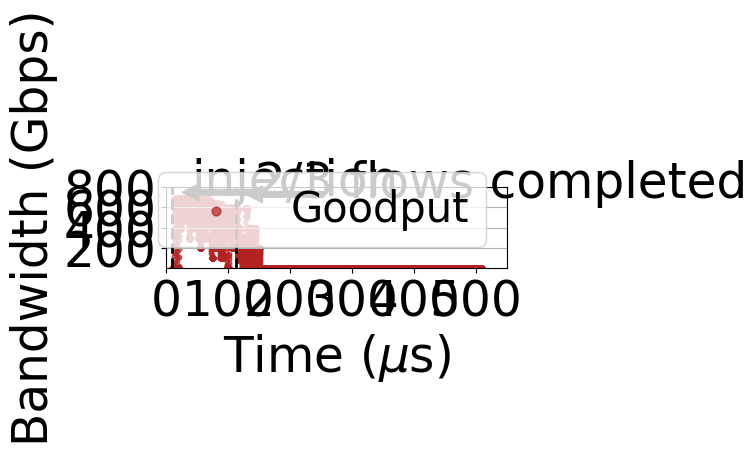

In [145]:
## NegotiaToR Permutation

import numpy as np
from matplotlib import pyplot as plt


# workloads = ['W4_0.1', 'W4_0.25', 'W4_0.5', 'W4_0.75', 'W4_1']
# workloads = ["incast_degree1", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
workloads = ["permutation_size50"]
# workloads = ['W4_1']
# workloads = ["permutation_size1", "permutation_size3", "permutation_size10", "permutation_size30", "permutation_size100"]
host_to_observe = 73
# myfontsize = 35

scheme = 'NegotiaToR'

load = 'Permutation'
show_intervals = [13, 26, 52, 78, 104, 208]
show_intervals = [104]

for iii, workload in enumerate(workloads):
    for show_interval in show_intervals:
        
        dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/DATA_vote_" + workload
        Dst_filename = dir_name + '/RECEIVER_BANDWIDTH.txt'
        Dst_bandwidth = np.loadtxt(Dst_filename, delimiter=" ", usecols=(host_to_observe,))

        

        sample_interval = 13
        # show_interval = 832
        show_time = 50000
        show_time = 500000
        start_time = 10000
        start_index = int(start_time/sample_interval)
        # start_index = 100000  #1.3ms
        merge = int(show_interval/sample_interval)
        print(merge)

        Dst_bandwidth_new = np.zeros(int(len(Dst_bandwidth)) - merge)
        for i in range(len(Dst_bandwidth_new)):
            Dst_bandwidth_new[i] = np.sum(Dst_bandwidth[i : i + merge]) 
        Dst_bandwidth_new = Dst_bandwidth_new[start_index : start_index + int(show_time/sample_interval)] *8/show_interval
        time_stamp = np.arange(len(Dst_bandwidth_new)) * sample_interval/1000 + start_index/1000*sample_interval# 用us做单位
        # print(np.shape(Dst_bandwidth))
        # print(np.shape(time_stamp))
        # plt.subplot(5,1,iii+1)
        # plt.figure(figsize=(20, 6))
        # ax=plt.axes()
        # ax.spines['bottom'].set_linewidth('2.0')
        # ax.spines['top'].set_linewidth('2.0')
        # ax.spines['left'].set_linewidth('2.0')
        # ax.spines['right'].set_linewidth('2.0')
        fig2=plt.subplot(212)
        
        plt.scatter(time_stamp, Dst_bandwidth_new, s=10, c='firebrick', alpha=0.7, label="Goodput")


        plt.xlabel(r"Time ($\mu$s)", fontsize=myfontsize)
        plt.ylabel("Bandwidth (Gbps)", fontsize=myfontsize)
        xticks = [0, 100, 200, 300, 400, 500]
        plt.xticks(xticks, fontsize=myfontsize)
        yticks = [200, 400, 600, 800]
        plt.yticks(yticks, fontsize=myfontsize)
        plt.grid(axis='y')

        plt.ylim([0,800])
        plt.legend(loc="lower right", fontsize=myfontsize-5, markerscale=2)
        data = np.loadtxt("../DATA/Count_BW_13/NegotiaToR_Permutation/DATA_vote_permutation_size50/FCT.txt", usecols=7)
        graduation_66 = np.percentile(data, 66) * 1e6 + 10
        plt.plot((graduation_66, graduation_66), (0,800), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (graduation_66,730), xytext=(70, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=graduation_66+30,y=700, s="2/3 flows completed", fontsize=myfontsize)

        plt.plot((10, 10), (0,800), linestyle='--', color='k', linewidth=2)
        plt.annotate('', (10,750), xytext=(70, 0),textcoords='offset points', fontsize=myfontsize, arrowprops=dict(facecolor='black', shrink=0.1))
        plt.text(x=10+30,y=720, s="injection", fontsize=myfontsize)
        # plt.title(workload)
        plt.xlim((0,550))
        plt.subplots_adjust( bottom=0.15, top=0.9, left=0.15, right=0.95)

        plt.tight_layout()
        plt.savefig("../FIGS/NegotiaToR Figs/5/"+ scheme + "_" + load +str(show_interval)+ ".png")


        

In [6]:
import numpy as np

data = np.loadtxt("../DATA/Count_BW_13/NegotiaToR_Permutation/DATA_vote_permutation_size50/FCT.txt", usecols=7)
graduation_66 = np.percentile(data, 66)
print(graduation_66)

data = np.loadtxt("../DATA/Count_BW_13/VLB_Permutation/DATA_vote_permutation_size50/FCT.txt", usecols=7)
graduation_66 = np.percentile(data, 66)
print(graduation_66)

data = np.loadtxt("../DATA/Count_BW_13/VLB_Pureincast/DATA_vote_incast_degree15/FCT.txt", usecols=7)
graduation_66 = np.percentile(data, 66)
print(graduation_66)

data = np.loadtxt("../DATA/Count_BW_13/NegotiaToR_Pureincast/DATA_vote_incast_degree15/FCT.txt", usecols=7)
graduation_66 = np.percentile(data, 66)
print(graduation_66)

0.00010275160003980766
0.00039789080023666656
1.4990800013103822e-05
1.5191600008845896e-05


In [2]:
# A = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0])
# x = np.nonzero(A)

# print(x)
import numpy as np
x=np.arange(0, 100)
y = x[::2]
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]
